In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
Cant_zeros = [ 'SkinThickness', 'Insulin']
df[Cant_zeros] = df[Cant_zeros].replace(0, np.nan)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
#Replacing the zero-values for Blood Pressure
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [11]:
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'BMI':0}, np.median(df1['BMI']))
df2 = df2.replace({'BMI':0}, np.median(df2['BMI']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

In [12]:
df1 = df.loc[df['Outcome'] == 1]
df2 = df.loc[df['Outcome'] == 0]
df1 = df1.replace({'Glucose':0}, np.mean(df1['Glucose']))
df2 = df2.replace({'Glucose':0}, np.mean(df2['Glucose']))
dataframe = [df1, df2]
df = pd.concat(dataframe)

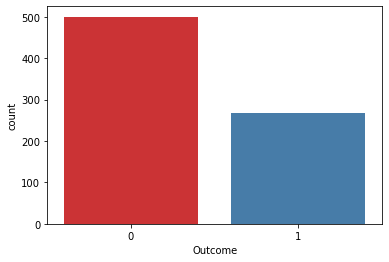

In [13]:
sns.countplot(x='Outcome', data=df, palette='Set1')
plt.show()

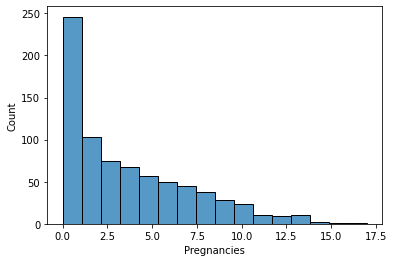

In [14]:
sns.histplot(df['Pregnancies'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

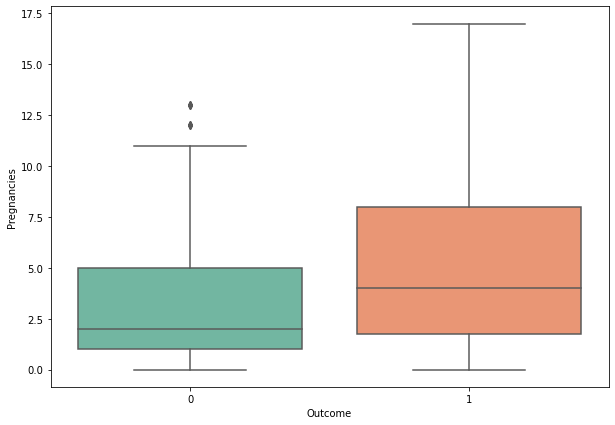

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='Pregnancies',data=df, palette='Set2')

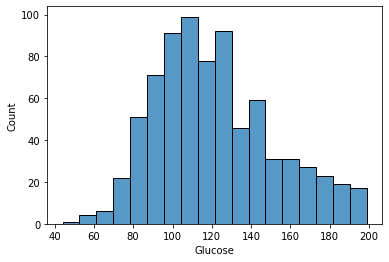

In [16]:
sns.histplot(df['Glucose'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

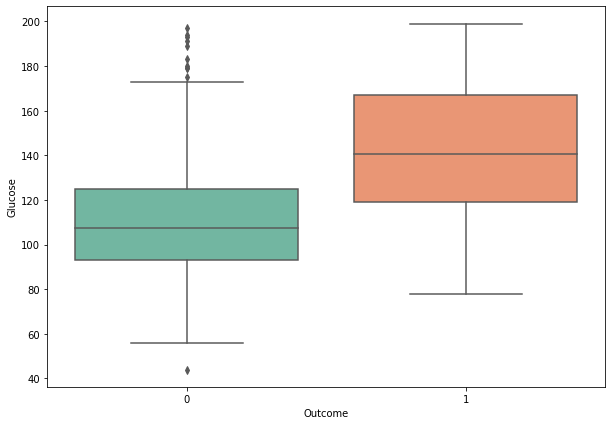

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='Glucose',data=df, palette='Set2')

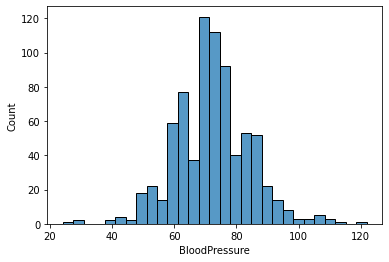

In [18]:
sns.histplot(df['BloodPressure'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

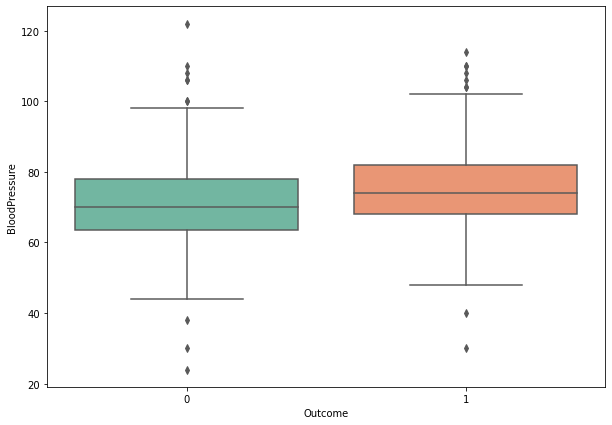

In [19]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='BloodPressure',data=df, palette='Set2')

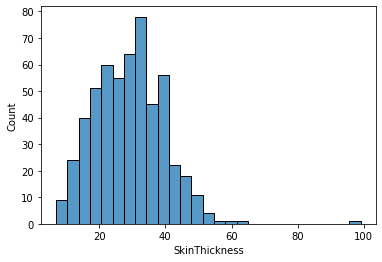

In [20]:
sns.histplot(df['SkinThickness'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

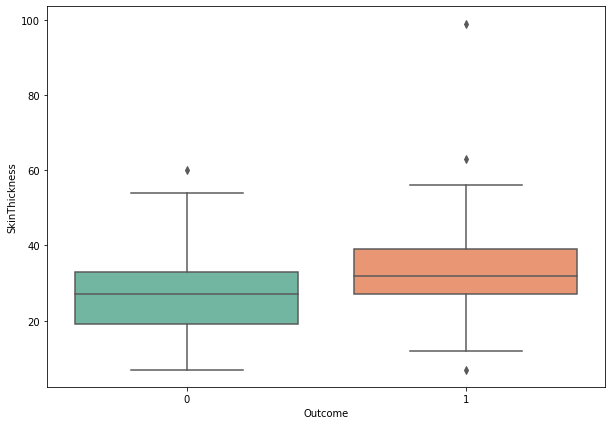

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='SkinThickness',data=df, palette='Set2')

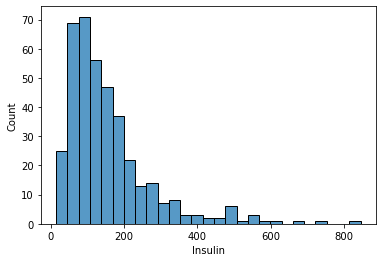

In [22]:
sns.histplot(df['Insulin'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

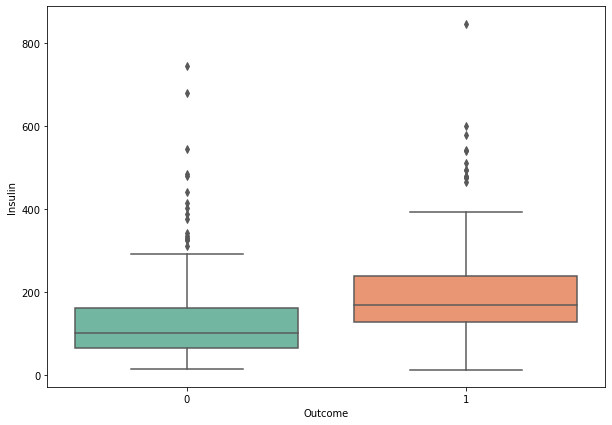

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='Insulin',data=df, palette='Set2')

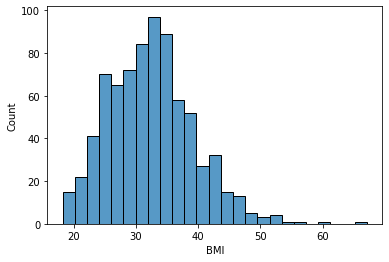

In [24]:
sns.histplot(df['BMI'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

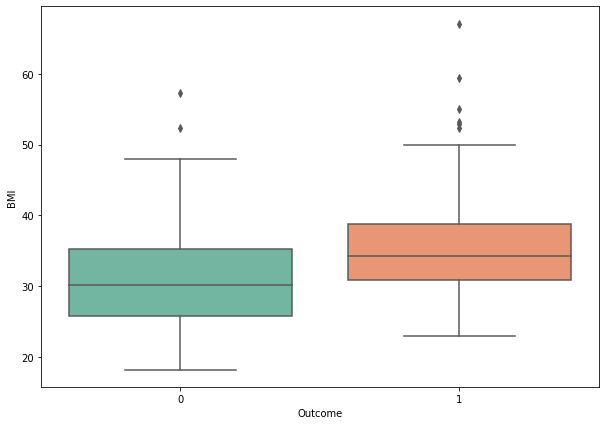

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='BMI',data=df, palette='Set2')

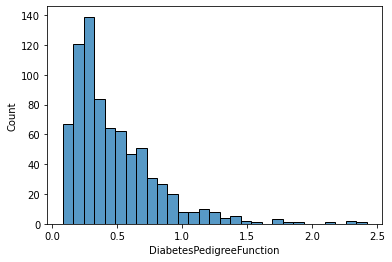

In [26]:
sns.histplot(df['DiabetesPedigreeFunction'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

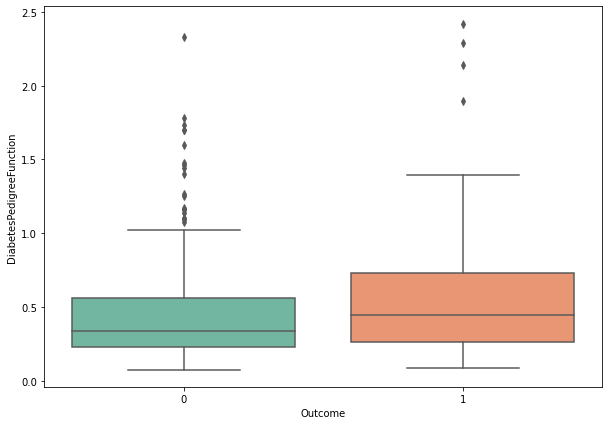

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=df, palette='Set2')

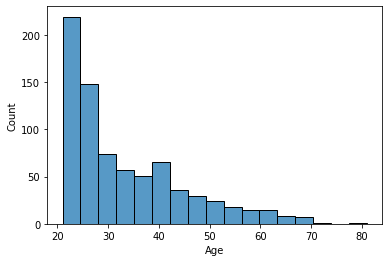

In [28]:
sns.histplot(df['Age'])
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

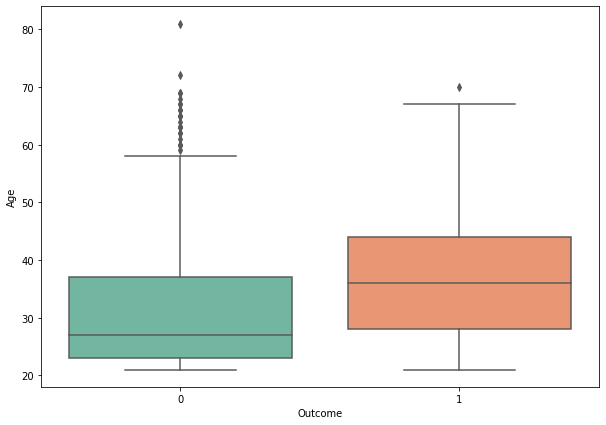

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Outcome',y='Age',data=df, palette='Set2')

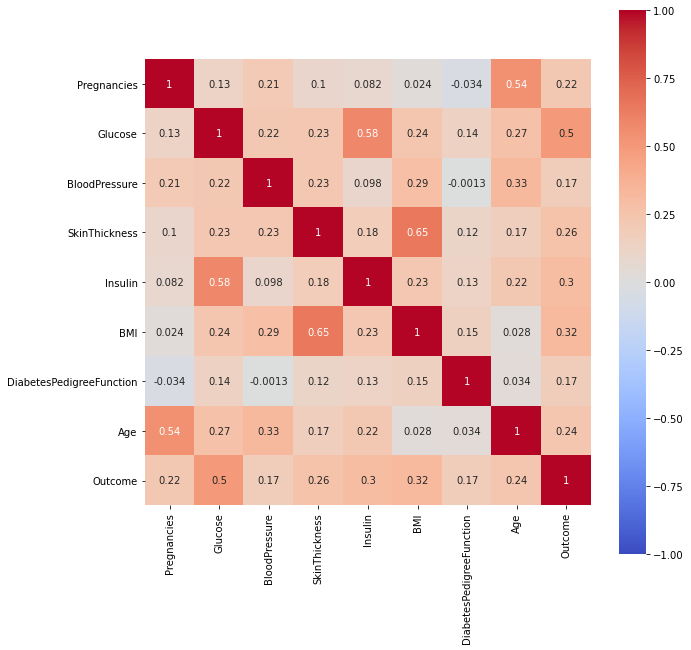

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.378906,29.153420,155.548223,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.104431,10.476982,118.775855,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
columns=df.columns

In [33]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns = columns )

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.691999,72.378906,29.090885,153.404036,32.433919,0.471876,33.240885,0.348958
std,3.369578,30.461151,12.104431,9.230298,95.899798,6.880664,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,88.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,135.600000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,34.050000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
#Splitting the data into dependent and independent variables
Y = df.Outcome
x = df.drop('Outcome', axis = 1)
columns = x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.2, random_state = 42)

In [37]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)


In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77
Accuracy of logistic regression classifier on test set: 0.75


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        97
         1.0       0.64      0.77      0.70        57

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.77      0.75      0.76       154



In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of KNN classifier on train set: {:.2f}'.format(model.score(x_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(model.score(x_test, y_test)))


Accuracy of KNN classifier on train set: 0.83
Accuracy of KNN classifier on test set: 0.77


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80        97
         1.0       0.64      0.88      0.74        57

    accuracy                           0.77       154
   macro avg       0.77      0.79      0.77       154
weighted avg       0.81      0.77      0.78       154



In [44]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel = "rbf")
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of KNN classifier on train set: {:.2f}'.format(classifier_rbf.score(x_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))

Accuracy of KNN classifier on train set: 0.85
Accuracy of KNN classifier on test set: 0.72


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.67      0.75        97
         1.0       0.59      0.81      0.68        57

    accuracy                           0.72       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.72      0.73       154

